In [21]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

In [22]:
mum_prop = pd.read_csv('Mumbai_Property.csv')

In [23]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [24]:
mum_prop.shape

(2580, 12)

In [25]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [26]:
mum_prop.Availability.value_counts()

Availability
Ready To Move         2565
Under Construction      15
Name: count, dtype: int64

In [27]:
mum_prop.Region.value_counts().head(20)

Region
Central Mumbai               225
Mira Road                    201
Kharghar Navi-Mumbai         196
Thane                        192
Ulwe Navi-Mumbai             174
Mumbai Harbour               104
South Mumbai                  98
Dombivli Thane                85
Hiranandani Thane             79
Ghansoli Navi-Mumbai          76
Kamothe Navi-Mumbai           64
Kandivali Mumbai              62
Panvel Navi-Mumbai            61
Malad Mumbai                  59
Kalyan Thane                  58
Andheri Mumbai                46
Taloja Navi-Mumbai            44
Manpada Thane                 42
Koparkhairane Navi-Mumbai     39
Borivali Mumbai               33
Name: count, dtype: int64

In [28]:
mum_prop.Region.nunique()

145

In [29]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [30]:
Q1 = np.quantile(mum_prop.Area_SqFt,0.02)
Q3 = np.quantile(mum_prop.Area_SqFt,0.98)
med = np.median(mum_prop.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Area_SqFt[(mum_prop.Area_SqFt <= lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [31]:
Q1 = np.quantile(mum_prop.Rate_SqFt,0.02)
Q3 = np.quantile(mum_prop.Rate_SqFt,0.80)
med = np.median(mum_prop.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt <= lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [32]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [33]:
mum_prop.duplicated().sum()

7

In [34]:
mum_prop = mum_prop.drop_duplicates(ignore_index=True)

In [35]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [36]:
mum_prop.shape

(2531, 12)

In [37]:
mum_prop.to_csv('Final_Project.csv', index_label = False)
mum_prop = pd.read_csv('Final_Project.csv')

In [38]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

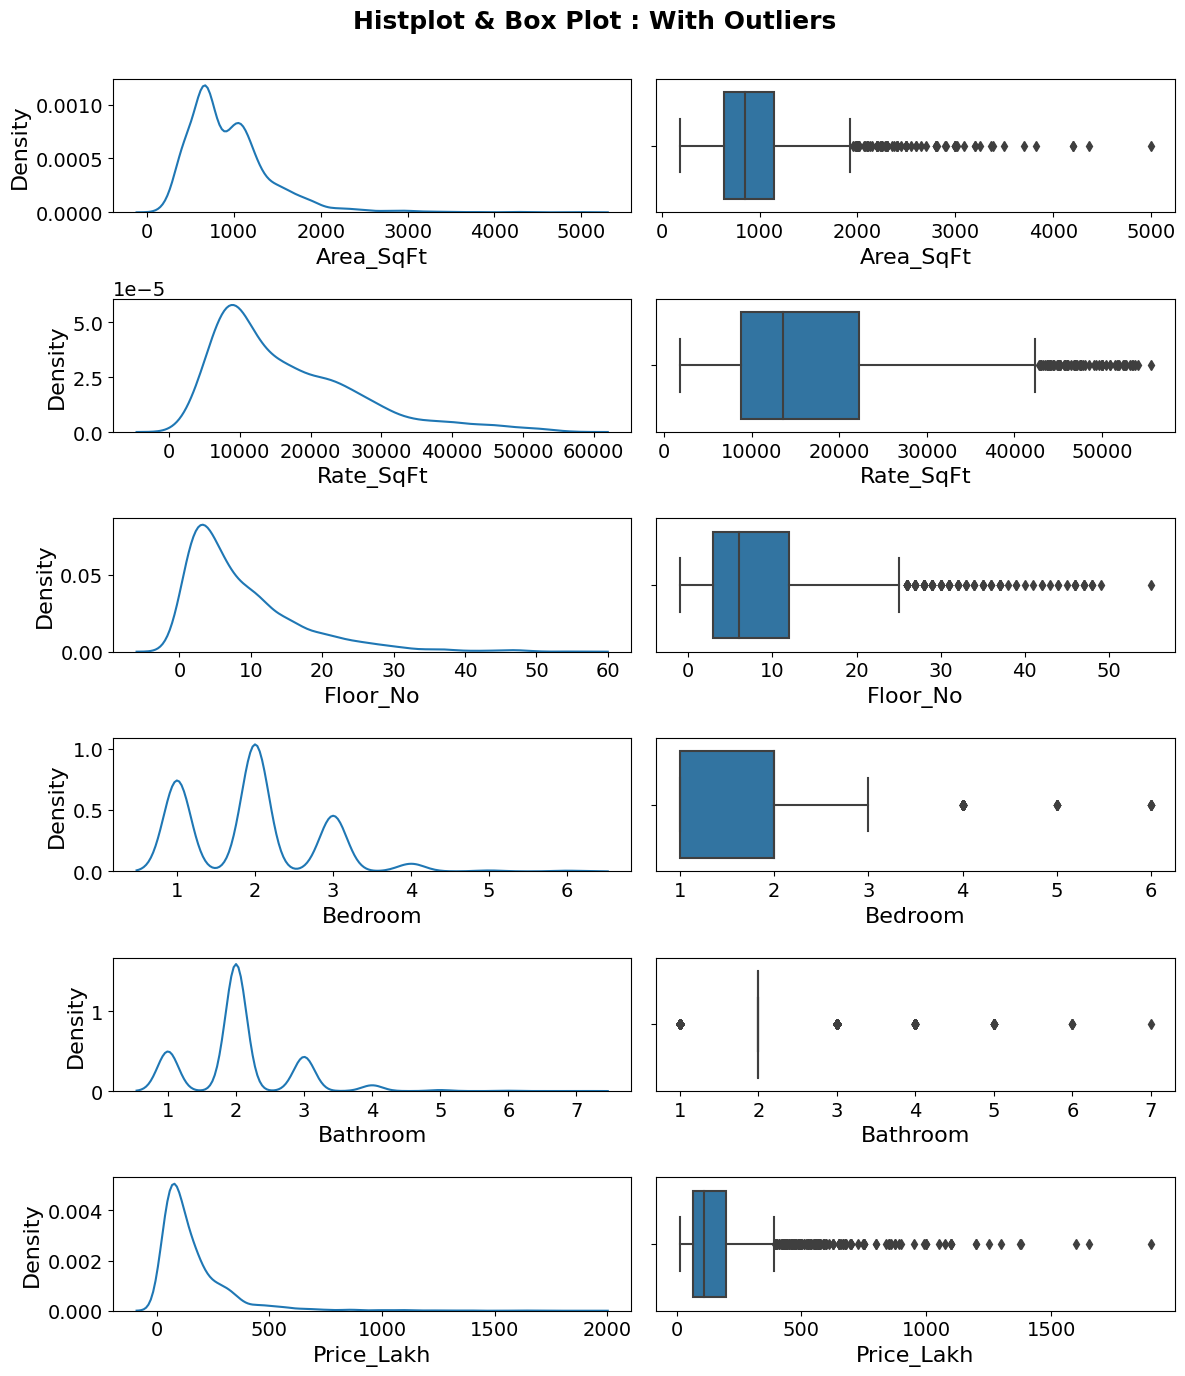

In [39]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

In [40]:
fig = plt.figure(figsize=(10,8))

sns.heatmap(mum_prop.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Heatmap', dpi = 250)

ValueError: could not convert string to float: 'Omkar Alta Monte '

<Figure size 1000x800 with 0 Axes>

In [ ]:
num_columns = mum_prop.describe().columns
categorical_cols = mum_prop.describe(include= 'object').columns

In [ ]:
mum_prop.nunique()

In [ ]:
binary_variables = [i  for i in mum_prop.columns  if (len(mum_prop[i].unique()) == 2)]

In [ ]:
binary_variables

In [ ]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 2 ) and (len(mum_prop[i].unique()) <= 53))]

In [ ]:
ordinal_variables

In [ ]:
continous_variable = [i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data

In [ ]:
continous_variable

In [ ]:
target_variable = 'Price_Lakh'

In [ ]:
target_variable

In [ ]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

In [ ]:
fig = plt.figure(figsize=(6,8))

plot = sns.barplot(data =mum_prop , x = mum_prop.Availability.value_counts().index,
            y = mum_prop.Availability.value_counts().values)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width()/2, bar.get_height()),
                  ha='center', va='center', size=15, xytext=(0,8), textcoords='offset points')

fig.suptitle('Availability : Counts',fontsize=18, fontweight="bold")
plt.xlabel('Availability',)
plt.ylabel('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Availability_Bar', dpi = 500)

In [ ]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

In [ ]:
fig = plt.figure(figsize=(10,6))

sns.barplot(data = mum_prop , x = mum_prop.groupby('Property_Age').median().Price_Lakh , y = mum_prop.groupby('Property_Age').median().index)
fig.suptitle('Price with respect to Property Age', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu',fontsize = 13, color ='blue')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Bar', dpi = 500)

In [ ]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Property_Age'].value_counts(),
       labels=['1 to 5 Year','0 to 1 Year','5 to 10 Year','10+ Year','Under Construction'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Price with respect to Property Age", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Shanu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Age_Distribution', dpi = 500)

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli',fontsize = 13, color ='blue')

sns.scatterplot(data = mum_prop , x = mum_prop['Property_Age'], y = mum_prop['Price_Lakh'])
plt.xlabel("Property Age", size=16)
plt.ylabel("Price (Lakhs)", size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Scatter', dpi = 500)

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,12))

sns.barplot(ax= ax[0], data =mum_prop , x = mum_prop.groupby('Bedroom').median().index, y = mum_prop.groupby('Bedroom').median().Price_Lakh)
sns.barplot(ax= ax[1], data = mum_prop , x = mum_prop.groupby('Bathroom').median().index, y = mum_prop.groupby('Bathroom').median().Price_Lakh)
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='black')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('BednBath_Price_Bar', dpi = 500)

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = mum_prop , x = mum_prop['Bedroom'], y = mum_prop['Price_Lakh'])
sns.scatterplot(ax= ax[1], data = mum_prop , x = mum_prop['Bathroom'], y = mum_prop['Price_Lakh'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

In [ ]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Area_Tpye'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Shanu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Area_Type_Distribution', dpi = 500)

In [ ]:
fig = plt.figure(figsize=(10,4))

sns.barplot(data =mum_prop , x =mum_prop.groupby('Area_Tpye').median().Price_Lakh, y =mum_prop.groupby('Area_Tpye').median().index)
fig.suptitle('Type of Area : Count', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Area_Type_Count_Bar', dpi = 500)

In [ ]:
fig = plt.figure(figsize=(12,6))
params = {'xtick.labelsize':'8','ytick.labelsize':'14','axes.labelsize':'16'}

sns.barplot(data= mum_prop, x= mum_prop.groupby('Floor_No').median().index, y= mum_prop.groupby('Floor_No').median().Price_Lakh, palette= 'muted')
fig.suptitle('Price with respect to Floor Numbers', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Floor_Numbers_Bar', dpi = 500)

In [ ]:
fig = plt.figure(figsize=(12,6))

group_full = mum_prop.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y = group['Price_Lakh']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('FloorNo_Price_Scatter', dpi = 500)

In [ ]:
for i in continous_variable:
    print("Length of", i,":", len(mum_prop[i].unique()))

In [ ]:
fig = plt.figure(figsize=(12,8))

group_full = mum_prop.groupby('Area_SqFt')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y = group['Price_Lakh']
fig.suptitle('Price with respect to SqFt Area', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='black')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price per Square Feet for Location Mira Road', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')

sns.histplot(mum_prop[mum_prop.Region == "Mira Road"].Rate_SqFt ,bins=100)
plt.xlabel("Price (Lakhs) Per Square Feet")
plt.ylabel("Count")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Rate_SqFt_Bar', dpi = 500)

## 9. Target Varible

In [ ]:
mum_prop['Price_Cat'] = pd.cut(x = mum_prop['Price_Lakh'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
mum_prop.Price_Cat.value_counts()

### Checking for Imbalanced or balanced dataset with regards to the Target

In [ ]:
fig = plt.figure(figsize = (8,8))

plt.pie(mum_prop['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Shanu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Range_Distribution', dpi = 500)

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')
sns.histplot(ax= ax[0],data=mum_prop["Price_Lakh"], kde =  True, bins = 200)
sns.boxplot(ax= ax[1], data=mum_prop["Price_Lakh"], orient="h", palette='muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

In [ ]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

x = mum_prop['Region']
y = mum_prop['Price_Lakh']

plot = px.Figure(data=[px.Bar(x=x, y=y)])
plot.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,stepmode="backward")])),
                              rangeslider=dict(visible=True)),width=900, height=900)

plot.show()

In [ ]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=mum_prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Region_wise_Price_Bar', dpi = 500)

## 11. Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [ ]:
mum_prop.Region.nunique()

In [ ]:
def plot_scatter_chart1(mum_prop,Region):
    fig  = plt.figure(figsize=(10,7))
    bhk2 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==2)]
    bhk3 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==3)]
    bhk4 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x=bhk2.Area_SqFt,y=bhk2.Price_Lakh,marker='p',color='blue',label='2 BHK',s=100)
    sns.scatterplot(x=bhk3.Area_SqFt,y=bhk3.Price_Lakh,marker='o',color='red',label='3 BHK',s=100)
    sns.scatterplot(x=bhk4.Area_SqFt,y=bhk4.Price_Lakh,marker='*',color='green',label='4 BHK',s=300)
    plt.xlabel("Total Square Feet Area", )
    plt.ylabel("Price (Lakhs Indian Rupees)")
    plt.title(Region, fontsize = 18, fontweight="bold")
    fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')


    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    #fig.savefig(Region, dpi = 500)

In [ ]:
plot_scatter_chart1(mum_prop,"Central Mumbai")

In [ ]:
plot_scatter_chart1(mum_prop,"South Mumbai")

In [ ]:
plot_scatter_chart1(mum_prop,"Mira Road")

In [ ]:
plot_scatter_chart1(mum_prop,"Thane")

## 12. Location Map (Geocoders)

In [ ]:
df = pd.read_csv('Map_Location.csv')

lat   = list(df['Latitude'])
lon   = list(df['Longitude'])
name  = list(df['Property_Name'])
add   = list(df['Location'])
price = list(df['Price'])
age   = list(df['Property_Age'])
avail = list(df['Availability'])
rate  = list(df['Rate_SqFt'])

gmap  = folium.Map(location=[19.15940, 73.07068], zoom_start=11)
fg    = folium.FeatureGroup(name="My Map").add_to(gmap)

In [ ]:
for lat,lon,name,add,price,age,avail,rate in zip(lat,lon,name,add,price,age,avail,rate):
    html = f"""<p style="color:green" > Property Name : {name}<p/>
               <p style="color:green" > Address : {add}<p/>
               <p style="color:red" > Price : {price}<p/>
               <p style="color:red" > Rate per SqFt : {rate}<p/>
               <p style="color:blue" > Property Age : {age}<p/>
               <p style="color:blue" > Availability : {avail}<p/>
            """
    iframe = folium.IFrame(html, width=250, height=270)
    popup  = folium.Popup(iframe, max_width=300)
    marker = folium.Marker([lat,lon], popup=(popup)).add_to(gmap)
    gmap.add_child(marker)

gmap.add_child(fg)
#gmap.save("mumbai_property.html")

# The End !!